# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy -- done from command line

In [2]:
# Dependencies and Setup
import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
from tqdm import tqdm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

today = date.today()

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
####ONLY FOR TESTING PURPOSES###
#cities = cities[0:50]
#print(cities)

In [5]:


#step 1: Get URL using for loop to pull in

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_list = []
country = []
lat = []
long = []
maxTemp = []
humidity = []
cloud = []
wind = []
#error counter
errorCount = 0

for city in tqdm(cities):
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_list.append(response['name'])
        country.append(response['sys']['country'])
        
    except:
        errorCount+=1
        
    #Wait a second in loop to not over exceed rate limit of API
    time.sleep(1.01)
print(f'{errorCount} cities not found')

100%|████████████████████████████████████████████████████████████████████████████████| 605/605 [16:09<00:00,  1.60s/it]


47 cities not found


In [29]:
#print(city_list)
#print(country)
#print(lat)
#print(long)
#print(maxTemp)
#print(humidity)
#print(cloud)
#print(wind)

In [7]:
city_weatherInfo= {'City':city_list, 'Country':country, 'Latitude':lat, 'Longitude':long,
               'High Temp':maxTemp, 'Humidity':humidity, 'Cloudiness':cloud, 'Wind Speed':wind}

#city_weatherInfo

In [8]:
#step 3: Convert to DF

city_weatherDF = pd.DataFrame(city_weatherInfo)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_weatherDF.to_csv('output_data_file')

In [10]:
city_weatherDF.head(10)

,City,Country,Latitude,Longitude,High Temp,Humidity,Cloudiness,Wind Speed
0,Cocorit,MX,27.58,-109.97,52.57,67,0,5.26
1,Laguna,US,38.42,-121.42,59.00,47,1,3.36
2,Rocha,UY,-34.48,-54.33,58.50,95,0,3.04
3,Ushuaia,AR,-54.80,-68.30,53.60,71,75,11.41
4,Busselton,AU,-33.65,115.33,91.99,41,100,5.01
5,Pisco,PE,-13.70,-76.22,70.00,83,100,1.12
6,Krasnosel'kup,RU,65.70,82.47,3.65,93,100,19.08
7,Bredasdorp,ZA,-34.53,20.04,68.00,82,1,9.17
8,Avarua,CK,-21.21,-159.78,80.60,83,99,14.99
9,Mataura,NZ,-46.19,168.86,63.00,76,78,8.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

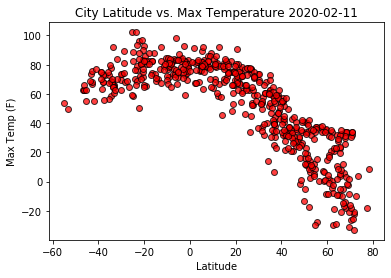

In [11]:
# The maximum x value for our chart will be 100
x_limit = 100
y_limit = 100



plt.scatter(lat, maxTemp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.title("City Latitude vs. Max Temperature " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

#### Latitude vs. Humidity Plot

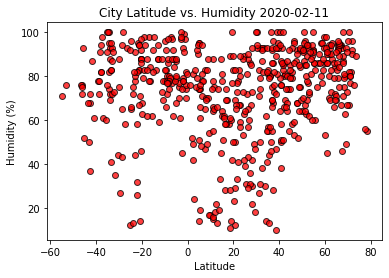

In [12]:
plt.scatter(lat, humidity, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Humidity " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

#### Latitude vs. Cloudiness Plot

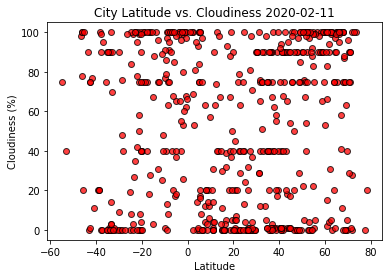

In [13]:
plt.scatter(lat, cloud, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Cloudiness " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

#### Latitude vs. Wind Speed Plot

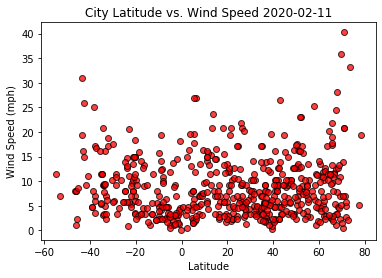

In [14]:
plt.scatter(lat, wind, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Wind Speed " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

In [30]:
#print(city_list)
#print(country)
#print(lat)
#print(long)
#print(maxTemp)
#print(humidity)
#print(cloud)
#print(wind)

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots


In [17]:
city_weatherDF.head(10)

,City,Country,Latitude,Longitude,High Temp,Humidity,Cloudiness,Wind Speed
0,Cocorit,MX,27.58,-109.97,52.57,67,0,5.26
1,Laguna,US,38.42,-121.42,59.00,47,1,3.36
2,Rocha,UY,-34.48,-54.33,58.50,95,0,3.04
3,Ushuaia,AR,-54.80,-68.30,53.60,71,75,11.41
4,Busselton,AU,-33.65,115.33,91.99,41,100,5.01
5,Pisco,PE,-13.70,-76.22,70.00,83,100,1.12
6,Krasnosel'kup,RU,65.70,82.47,3.65,93,100,19.08
7,Bredasdorp,ZA,-34.53,20.04,68.00,82,1,9.17
8,Avarua,CK,-21.21,-159.78,80.60,83,99,14.99
9,Mataura,NZ,-46.19,168.86,63.00,76,78,8.01


In [18]:
# Create Northern and Southern Hemisphere DataFrames

north_df = city_weatherDF[city_weatherDF['Latitude'] >= 0]

south_df = city_weatherDF[city_weatherDF['Latitude'] <= 0]

In [19]:
north_df.head()

,City,Country,Latitude,Longitude,High Temp,Humidity,Cloudiness,Wind Speed
0,Cocorit,MX,27.58,-109.97,52.57,67,0,5.26
1,Laguna,US,38.42,-121.42,59.00,47,1,3.36
6,Krasnosel'kup,RU,65.70,82.47,3.65,93,100,19.08
10,Avera,US,33.19,-82.53,68.00,93,90,4.70
11,Nisibis,TR,37.08,41.22,30.20,68,40,13.87


In [20]:
south_df.head()

,City,Country,Latitude,Longitude,High Temp,Humidity,Cloudiness,Wind Speed
2,Rocha,UY,-34.48,-54.33,58.50,95,0,3.04
3,Ushuaia,AR,-54.80,-68.30,53.60,71,75,11.41
4,Busselton,AU,-33.65,115.33,91.99,41,100,5.01
5,Pisco,PE,-13.70,-76.22,70.00,83,100,1.12
7,Bredasdorp,ZA,-34.53,20.04,68.00,82,1,9.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-1.3089430765114645
92.76050277298543
-0.871433208254204
8.899675603459198e-122
0.037452666303776576
---------------------
y = -1.31x + 92.76


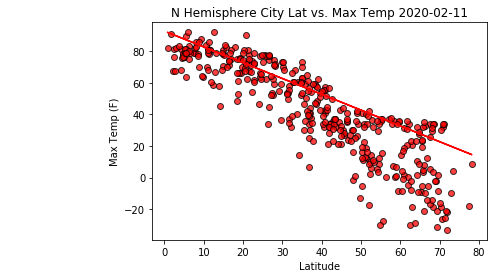

In [21]:
x_limit = 100
y_limit = 100


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['High Temp'])
regress_values = north_df['Latitude'] * int(slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print("---------------------")
print(line_eq)

plt.scatter(north_df['Latitude'], north_df['High Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

plt.title("N Hemisphere City Lat vs. Max Temp " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.3208580501252232
81.79955524645094
0.4430283688989101
1.6220187254151507e-09
0.05024318240331862
---------------------
y = 0.32x + 81.8


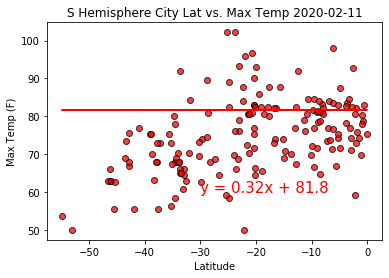

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['High Temp'])
regress_values = south_df['Latitude'] * int(slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print("---------------------")
print(line_eq)

plt.scatter(south_df['Latitude'], south_df['High Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")

plt.title("S Hemisphere City Lat vs. Max Temp " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.41986801413558633
55.750756067719884
0.39601233847847805
4.669692949315114e-16
0.04948883757116853
---------------------
y = 0.42x + 55.75


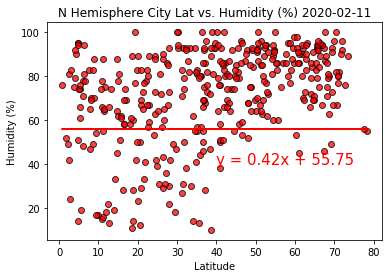

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['Humidity'])
regress_values = north_df['Latitude'] * int(slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print("---------------------")
print(line_eq)

plt.scatter(north_df['Latitude'], north_df['Humidity'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

plt.title("N Hemisphere City Lat vs. Humidity (%) " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.2100020801712848
81.79240904872131
0.1605110550284007
0.03709712083099789
0.09992923055059208
---------------------
y = 0.21x + 81.79


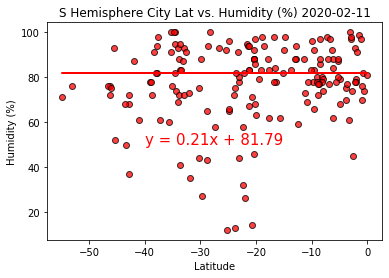

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['Humidity'])
regress_values = south_df['Latitude'] * int(slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print("---------------------")
print(line_eq)

plt.scatter(south_df['Latitude'], south_df['Humidity'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")

plt.title("S Hemisphere City Lat vs. Humidity (%) " + str(today))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.6518177449951965
24.79188540062623
0.3256669550276132
4.616863787236649e-11
0.09619476542843569
---------------------
y = 0.65x + 24.79


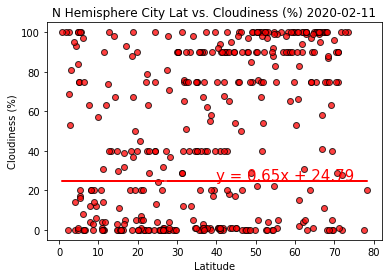

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['Cloudiness'])
regress_values = north_df['Latitude'] * int(slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print("---------------------")
print(line_eq)

plt.scatter(north_df['Latitude'], north_df['Cloudiness'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")

plt.title("N Hemisphere City Lat vs. Cloudiness (%) " + str(today))
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.6940911421630809
71.35826537558908
0.24115805690379727
0.00158562881613118
0.21614525186142475
---------------------
y = 0.69x + 71.36


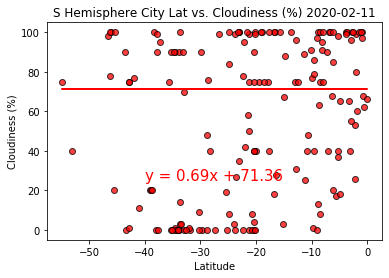

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['Cloudiness'])
regress_values = south_df['Latitude'] * int(slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print("---------------------")
print(line_eq)

plt.scatter(south_df['Latitude'], south_df['Cloudiness'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")

plt.title("S Hemisphere City Lat vs. Cloudiness (%) " + str(today))
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.025730117418694732
7.800327265440083
0.08503646314576414
0.09396982273884524
0.015325164925032468
---------------------
y = 0.03x + 7.8


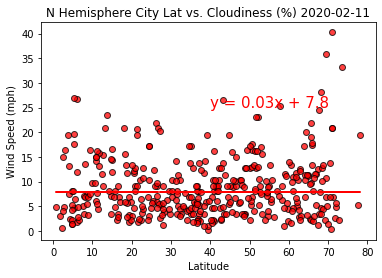

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'], north_df['Wind Speed'])
regress_values = north_df['Latitude'] * int(slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print("---------------------")
print(line_eq)

plt.scatter(north_df['Latitude'], north_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.plot(north_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")

plt.title("N Hemisphere City Lat vs. Cloudiness (%) " + str(today))
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.1474162759270455
5.105600246888559
-0.35467425377163075
2.2311519048724007e-06
0.03007214945391697
---------------------
y = -0.15x + 5.11


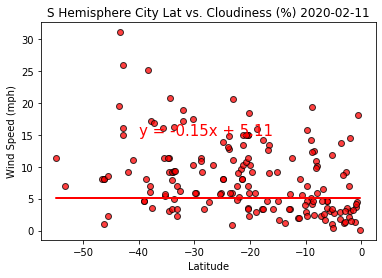

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'], south_df['Wind Speed'])
regress_values = south_df['Latitude'] * int(slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)
print("---------------------")
print(line_eq)

plt.scatter(south_df['Latitude'], south_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


plt.plot(south_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-40,15),fontsize=15,color="red")

plt.title("S Hemisphere City Lat vs. Cloudiness (%) " + str(today))
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.show()